# KLASIFIKASI BUNGA IRIS

Pada tugas besar ini akan dilakukan klasifikasi jenis bunga Iris menjadi 3 spesies, "Iris-setosa", "Iris-versicolor", dan "Iris-virginica". 
Anggota Kelompok:
- Muhammad Naufal (F1D 016 060) - HARD CARRY

# BAGIAN 1 - DATA PREPARATION

In [1]:
import pandas as pd

Dilakukan import library pandas, library pandas sendiri digunakan untuk melakukan proses load data dari file .csv. Pada aplikasi ini pandas diimpor dengan alias "pd" untuk memudahkan akses nama library yang lebih singkat

In [2]:
data = pd.read_csv('Iris.csv')

Dilakukan proses load data dari file .csv dengan memanggil method read_csv() dari library pandas untuk me-load data .csv yang berisi data bunga Iris dan disimpan ke dalam variabel "data"

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Pada tabel di atas ditampilkan data yang sudah di-load dari file .csv yang disimpan dalam variabel bernama data, dimana variabel ini bertipe pandas dataframe
Terdpat 150 baris data Bunga Iris yang terdiri dari 6 kolom
Dari 6 kolom yang tersedia, 5 kolom berisi angka numerik, dan 4 di antaranya bernilai kontinu dan  1 kolom lainnya adalah kolom id yang hanya menunjukkan index atau id dari data.
Selain itu terdapat 1 buah kolom yang bernama Species, dimana data ini bersifat kategorial yang menunjukkan kategori atau jenis bunga Iris

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Pada blok kode di atas dilakukan pengecekan jumlah data yang bernilai null atua kosong pada data yang sudah di-load. Ternyata untuk semua kolom, jumlah data yang null atau kosong adalah 0 yang menunjukkan bahwa data lengkap, sehingga tidak perlu dilakukan proses untuk eliminasi atau melakukan proses replace seperti menggunakan interpolasi untuk data yang kosong.

In [6]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Pada blok kode di atas ditampilkan korelasi antar dua variabel/kolom. Rentang nilai korelasi berada pada rentang -1 sampai 1

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

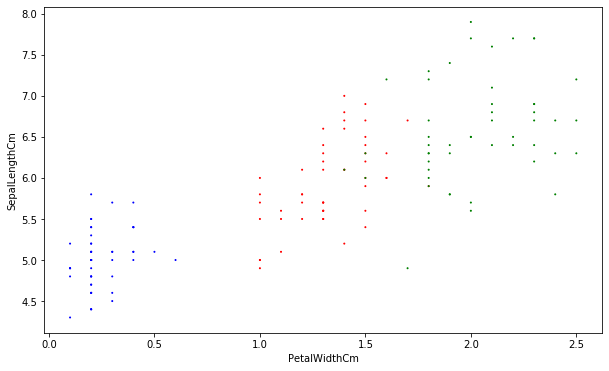

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalWidthCm'], data['SepalLengthCm'], data['Species']=="Iris-versicolor", color='red')
plt.scatter(data['PetalWidthCm'], data['SepalLengthCm'], data['Species']=="Iris-setosa", color='blue')
plt.scatter(data['PetalWidthCm'], data['SepalLengthCm'], data['Species']=="Iris-virginica", color='green')
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()

Pada kode di atas ditampilkan visualisasi korelasi antar data PetalWidth dan SepalLength, dimana pada scatterplot di atas ditampilkan sesuai warna masing-masing kategori atau kelas, terlihat bahwa antar kelas memilki daerah yang terbagi jelas.

# BAGIAN 2 - TRAINING

Sebelum proses fitting atau train data dilakukan, perlu adanya normalisasi yang dilakukan untuk data yang ada dan pembagian data menjadi data train & testing

In [10]:
data['Species']=data['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

Kode di atas digunakan untuk melakukan mapping dari kategori yang bertipe string menjadi index dalam bentuk angka

In [11]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [12]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, -1].values

Blok kode di atas digunakan untuk membagi data menjadi data input dan output, dimana X akan mengambil seluruh nilai pada kolom index 1 sampai kurang dari 5, dan y akan terisi oleh nilai di kolom terakhir yang merupakan kolom kelas atau target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

Blok kode di atas digunakan untuk membagi data menjadi data train dan data testing, dimana pembagian untuk data training dan data testing adalah 80%:20% dengan random state sebesar 45 untuk mengacak data karena data awal masih terurut berdasarkan kategori atau kelasnya masing-masing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Pada kode di atas, dilakukan suatu proses scaling untuk nilai input atau nilai X yang sudah terbagi menjadi X_train dan X_test, dimana scaling sendiri dilakukan untuk normalisasi atau scaling input secara default object scaler sendiri akan melakukan scaling atau normalisasi dengan variance based

In [21]:
X_train

array([[ 1.15648738, -0.54035544,  0.59307474,  0.26928484],
       [-0.17327163, -0.31829156,  0.24870876,  0.13684967],
       [ 0.18938992, -1.87273871,  0.70786339,  0.40172   ],
       [-0.05238445, -0.76241932,  0.76525772,  0.93146067],
       [-1.01948191, -0.09622768, -1.2435438 , -1.31993715],
       [ 0.67293865,  0.1258362 ,  0.99483504,  0.7990255 ],
       [-1.86569218, -0.09622768, -1.53051545, -1.45237232],
       [-1.01948191,  0.79202784, -1.2435438 , -1.05506682],
       [ 0.67293865, -0.31829156,  0.30610309,  0.13684967],
       [-1.26125627,  0.1258362 , -1.2435438 , -1.31993715],
       [-0.41504599,  2.56853887, -1.35833246, -1.31993715],
       [-0.05238445, -0.76241932,  0.07652577,  0.00441451],
       [-1.14036909, -0.09622768, -1.35833246, -1.31993715],
       [ 1.27737456,  0.1258362 ,  0.65046907,  0.40172   ],
       [-1.01948191, -1.65067484, -0.2678402 , -0.26045583],
       [-0.89859472,  1.45821947, -1.30093813, -1.05506682],
       [ 0.67293865, -0.